# Convergence of the Metropolis Sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import numpy.random as rd
import copy
import os
import warnings
cwd = os.getcwd()
import seaborn as sns

sns.set()

In [8]:
# Retrieve simulation parameters

simulationParameters = np.loadtxt('simulationParameters.txt')

NSITES = int(simulationParameters[0])
dt = simulationParameters[1]
beta = simulationParameters[2]
L = int(simulationParameters[3])
t = simulationParameters[4]
U = simulationParameters[5]
mu = simulationParameters[6]
totalMCSweeps = int(simulationParameters[7])
freq = int(simulationParameters[8])

# Load weights to plot

weights = np.loadtxt('weights.txt')

M = weights.size

time = np.arange(M)/NSITES/L   #measured in sweeps

directory1 = (str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

directory2 = (str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu) + '/data-to-reproduce')
            
if not os.path.exists(directory1):
    os.makedirs(directory1)
    
if not os.path.exists(directory2):
    os.makedirs(directory2)
    
np.savetxt(directory2 + '/weights_' + \
           'totalMCSweeps_' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '.txt', (weights))
np.savetxt(directory2 + '/simulationParameters_' + \
           'totalMCSweeps_' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '.txt', (simulationParameters))

Text(0,0.5,'$\\log [ P(h) ] + \\log (Z/A)$')

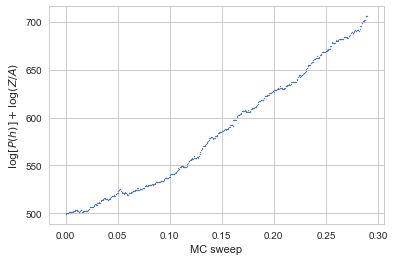

In [9]:
sns.set_style("whitegrid")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
plt.scatter(time, np.log(weights), s = 1)
plt.xlabel('MC sweep')
plt.ylabel(r'$\log [ P(h) ] + \log (Z/A)$')
#plt.savefig(directory1 + '/weightsVsMCstep' + str(totalMCSweeps) + 'sweeps' + \
#            '_freq_' + str(freq) + '.png', dpi = 600)

# Measuring electron density

In [31]:
electronDensity = np.loadtxt('electronDensity.txt')
np.savetxt(directory2 + '/electronDensity' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '.txt', (electronDensity))

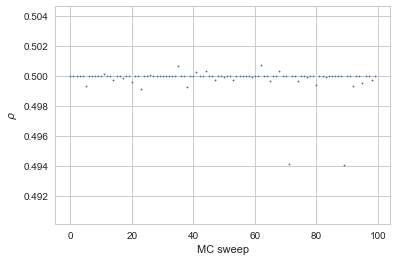

In [38]:
sweep = np.arange(totalMCSweeps)
plt.scatter(sweep, electronDensity, s = 2)
plt.xlabel('MC sweep')
plt.ylabel(r'$\rho$')
plt.savefig(directory1 + '/electronDensity' + str(totalMCSweeps) + 'sweeps' + \
            '_freq_' + str(freq) + '.png', dpi = 600)

# Auto-correlation time